In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [2]:
accidents_causa= pd.read_csv("/Users/dannaciendua/Documents/CodeOp/group_project/dataset_gruopp/2023translated_content_accidents_causa.csv")


### Check the table, what I need and what I dont need, understand the information I have

In [3]:
accidents_causa

Case_Number  District_Code District_Name  Neighborhood_Code  \
0     2023S000699                 -1       Unknown                 -1   
1     2023S005197                 -1       Unknown                 -1   
2     2023S007430                 -1       Unknown                 -1   
3     2023S000961                 -1       Unknown                 -1   
4     2023S006486                 -1       Unknown                 -1   
...               ...            ...           ...                ...   
8892  2023S000678                  8    Nou Barris                 44   
8893  2023S006888                  8    Nou Barris                 44   
8894  2023S007283                  8    Nou Barris                 45   
8895  2023S007283                  8    Nou Barris                 45   
8896  2023S004812                  8    Nou Barris                 44   

                  Neighborhood_Name  Street_Code  \
0                           Unknown           -1   
1                           Unknown           -1   
2                           Unknown           -1   
3                           Unknown           -1   
4                           Unknown           -1   
...                             ...          ...   
8892  Vilapicina i la Torre Llobeta       119003   
8893  Vilapicina i la Torre Llobeta        45701   
8894                          Porta       256401   
8895                          Porta       256401   
8896  Vilapicina i la Torre Llobeta       274505   

                                            Street_Name Postal_Code  \
0     Rovira (ascendent)                            ...  0            
1     Estatut de Catalunya                          ...  11           
2     Rovira (ascendent)                            ...  0            
3     Amílcar                                       ...  120          
4     Augusta / Hort de la Vila                     ...         NaN   
...                                                 ...         ...   
8892                                       Fabra i Puig   0181 0181   
8893                                             Quinze   0068 0068   
8894                                    Pintor Alsamora   0001 0001   
8895                                    Pintor Alsamora   0001 0001   
8896                                         Ramon Albó   0059 0061   

     Day_of_Week  Year  Month_Code Month_Name  Day_of_Month  Hour_of_Day  \
0       Saturday  2023           2   February             4           16   
1         Friday  2023           9  September             1           13   
2         Friday  2023          12   December            15           11   
3       Saturday  2023           1    January            28           14   
4       Thursday  2023          11   November             2           14   
...          ...   ...         ...        ...           ...          ...   
8892      Friday  2023           2   February             3           17   
8893     Dilluns  2023          11   November            20           14   
8894      Friday  2023          12   December             8            6   
8895      Friday  2023          12   December             8            6   
8896    Dimecres  2023           8     August             9           12   

     Shift_Description         Immediate_Cause_Description  UTM_X_Coordinate  \
0            Afternoon           Lack of driving attention         430443.36   
1              Morning            Not respecting distances         429493.73   
2              Morning            Not respecting distances         430443.36   
3            Afternoon  Not respecting pedestrian crossing         430955.45   
4            Afternoon              Ignoring traffic light         426883.33   
...                ...                                 ...               ...   
8892         Afternoon    Avançament defectuós/improcedent         431379.36   
8893         Afternoon            Not respecting distances         431122.09   
8894           Morning

In [4]:
accidents_causa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8897 entries, 0 to 8896
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Case_Number                  8897 non-null   object 
 1   District_Code                8897 non-null   int64  
 2   District_Name                8897 non-null   object 
 3   Neighborhood_Code            8897 non-null   int64  
 4   Neighborhood_Name            8897 non-null   object 
 5   Street_Code                  8897 non-null   int64  
 6   Street_Name                  8897 non-null   object 
 7   Postal_Code                  8893 non-null   object 
 8   Day_of_Week                  8897 non-null   object 
 9   Year                         8897 non-null   int64  
 10  Month_Code                   8897 non-null   int64  
 11  Month_Name                   8897 non-null   object 
 12  Day_of_Month                 8897 non-null   int64  
 13  Hour_of_Day       

In [30]:
# Cleaned-up cause translation dictionary
cause_translation = {
    'Lack of driving attention': 'Lack of Attention',
    'Not respecting distances': 'Not Respecting Distances',
    'Not respecting pedestrian crossing': 'Not Respecting Pedestrian Crossing',
    'Ignoring traffic light': 'Ignoring Traffic Light',
    'Desobeir altres senyals': 'Ignoring Other Signals',
    'Gir indegut o sense precaució': 'Improper or Careless Turn',
    'Altres': 'Others',
    'Others': 'Others',  # Unified with "Altres"
    'Unknown': 'Unknown',
    'No determinada': 'Unknown',  # Unified with "Unknown"
    'Avançament defectuós/improcedent': 'Improper Overtaking',
    'Canvi de carril sense precaució': 'Unsafe Lane Change',
    'Manca precaució incorporació circulació': 'Lack of Caution Joining Traffic',
    'No cedir la dreta': 'Failure to Yield',
    'Manca precaució efectuar marxa enrera': 'Lack of Caution Reversing',
    'Envair calçada contrària': 'Entering Opposite Lane',
    'Fallada mecànica o avaria': 'Mechanical Failure',
    'Dilluns': 'Monday',
    'Dimarts': 'Tuesday',
    'Dimecres': 'Wednesday',
    'Dijous': 'Thursday',
    'Divendres': 'Friday',
    'Dissabte': 'Saturday',
    'Diumenge': 'Sunday',
    'Saturday': 'Saturday',
    'Friday': 'Friday',
    'Thursday': 'Thursday'
}

# Replace values in the column
accidents_causa['Immediate_Cause_Description'] = accidents_causa['Immediate_Cause_Description'].replace(cause_translation)
accidents_causa['Driver_Cause_Description'] = accidents_causa['Driver_Cause_Description'].replace(cause_translation)
accidents_causa['Day_of_Week'] = accidents_causa['Day_of_Week'].replace(cause_translation)


# Verify the replacement
print(accidents_causa['Immediate_Cause_Description'].unique())
print(accidents_causa['Driver_Cause_Description'].unique())

['Lack of Attention' 'Not Respecting Distances'
 'Not Respecting Pedestrian Crossing' 'Ignoring Traffic Light'
 'Ignoring Other Signals' 'Improper or Careless Turn' 'Others' 'Unknown'
 'Improper Overtaking' 'Unsafe Lane Change'
 'Lack of Caution Joining Traffic' 'Failure to Yield'
 'Lack of Caution Reversing' 'Entering Opposite Lane' 'Mechanical Failure']
['Lack of Attention' 'Not Respecting Distances'
 'Not Respecting Pedestrian Crossing' 'Ignoring Traffic Light'
 'Ignoring Other Signals' 'Improper or Careless Turn' 'Others'
 'Improper Overtaking' 'Unsafe Lane Change'
 'Lack of Caution Joining Traffic' 'Failure to Yield'
 'Lack of Caution Reversing' 'Entering Opposite Lane' 'Mechanical Failure']


### Drop columns i dont need

In [31]:
columns_to_drop = ['District_Code', 'Neighborhood_Code', 'Street_Code', 'Postal_Code']
columns_existing = [col for col in columns_to_drop if col in accidents_causa.columns]
accidents_causa = accidents_causa.drop(columns=columns_existing, inplace=False)

# Display the first few rows
print(accidents_causa.head())

       Case_Number District_Name Neighborhood_Name                Street_Name  \
0  2023S000699           Unknown           Unknown         Rovira (ascendent)   
1  2023S005197           Unknown           Unknown       Estatut de Catalunya   
2  2023S007430           Unknown           Unknown         Rovira (ascendent)   
3  2023S000961           Unknown           Unknown                    Amílcar   
4  2023S006486           Unknown           Unknown  Augusta / Hort de la Vila   

  Day_of_Week  Year  Month_Code Month_Name  Day_of_Month  Hour_of_Day  \
0    Saturday  2023           2   February             4           16   
1      Friday  2023           9  September             1           13   
2      Friday  2023          12   December            15           11   
3    Saturday  2023           1    January            28           14   
4    Thursday  2023          11   November             2           14   

  Shift_Description         Immediate_Cause_Description  UTM_X_Coordinate 

### check for missing values

In [32]:
print("Missing values in Accidents Causes dataset:")
print(accidents_causa.isnull().sum())

Missing values in Accidents Causes dataset:
Case_Number                    0
District_Name                  0
Neighborhood_Name              0
Street_Name                    0
Day_of_Week                    0
Year                           0
Month_Code                     0
Month_Name                     0
Day_of_Month                   0
Hour_of_Day                    0
Shift_Description              0
Immediate_Cause_Description    0
UTM_X_Coordinate               0
UTM_Y_Coordinate               0
Longitude                      0
Latitude                       0
datetime                       0
Driver_Cause_Description       0
dtype: int64


### check for unique values

In [33]:
for column in accidents_causa.columns:
    unique_values = accidents_causa['Street_Name'].unique()
    print(f"Column: {'Street_Name'}")
    print(f"Unique Values: {unique_values}")
    print("-" * 50)

Column: Street_Name
Unique Values: ['Rovira (ascendent)' 'Estatut de Catalunya' 'Amílcar' ... 'Tàrrega'
 'Foc Follet' 'Emili Roca']
--------------------------------------------------
Column: Street_Name
Unique Values: ['Rovira (ascendent)' 'Estatut de Catalunya' 'Amílcar' ... 'Tàrrega'
 'Foc Follet' 'Emili Roca']
--------------------------------------------------
Column: Street_Name
Unique Values: ['Rovira (ascendent)' 'Estatut de Catalunya' 'Amílcar' ... 'Tàrrega'
 'Foc Follet' 'Emili Roca']
--------------------------------------------------
Column: Street_Name
Unique Values: ['Rovira (ascendent)' 'Estatut de Catalunya' 'Amílcar' ... 'Tàrrega'
 'Foc Follet' 'Emili Roca']
--------------------------------------------------
Column: Street_Name
Unique Values: ['Rovira (ascendent)' 'Estatut de Catalunya' 'Amílcar' ... 'Tàrrega'
 'Foc Follet' 'Emili Roca']
--------------------------------------------------
Column: Street_Name
Unique Values: ['Rovira (ascendent)' 'Estatut de Catalunya' 'Amíl

### Create datetime column

In [34]:
accidents_causa['datetime'] = pd.to_datetime({
    'year': accidents_causa['Year'],
    'month': accidents_causa['Month_Code'],
    'day': accidents_causa['Day_of_Month']
}) + pd.to_timedelta(accidents_causa['Hour_of_Day'], unit='h')

# Display the first few rows with the new datetime column
print(accidents_causa[['datetime']].head())

             datetime
0 2023-02-04 16:00:00
1 2023-09-01 13:00:00
2 2023-12-15 11:00:00
3 2023-01-28 14:00:00
4 2023-11-02 14:00:00


In [9]:
accidents_causa.head()

Case_Number  District_Code District_Name  Neighborhood_Code  \
0  2023S000699                 -1       Unknown                 -1   
1  2023S005197                 -1       Unknown                 -1   
2  2023S007430                 -1       Unknown                 -1   
3  2023S000961                 -1       Unknown                 -1   
4  2023S006486                 -1       Unknown                 -1   

  Neighborhood_Name  Street_Code  \
0           Unknown           -1   
1           Unknown           -1   
2           Unknown           -1   
3           Unknown           -1   
4           Unknown           -1   

                                         Street_Name Postal_Code Day_of_Week  \
0  Rovira (ascendent)                            ...  0             Saturday   
1  Estatut de Catalunya                          ...  11              Friday   
2  Rovira (ascendent)                            ...  0               Friday   
3  Amílcar                                       ...  120           Saturday   
4  Augusta / Hort de la Vila                     ...         NaN    Thursday   

   Year  ...  Month_Name Day_of_Month  Hour_of_Day  Shift_Description  \
0  2023  ...    February            4           16          Afternoon   
1  2023  ...   September            1           13            Morning   
2  2023  ...    December           15           11            Morning   
3  2023  ...     January           28           14          Afternoon   
4  2023  ...    November            2           14          Afternoon   

          Immediate_Cause_Description UTM_X_Coordinate  UTM_Y_Coordinate  \
0                   Lack of Attention        430443.36        4585232.00   
1            Not Respecting Distances        429493.73        4587108.15   
2            Not Respecting Distances        430443.36        4585232.00   
3  Not Respecting Pedestrian Crossing        430955.45        4586335.10   
4              Ignoring Traffic Light        426883.33        4583690.92   

   Longitude   Latitude            datetime  
0   2.166596  41.413783 2023-02-04 16:00:00  
1   2.155015  41.430598 2023-09-01 13:00:00  
2   2.166596  41.413783 2023-12-15 11:00:00  
3   2.172596  41.423762 2023-01-28 14:00:00  
4   2.124189  41.399587 2023-11-02 14:00:00  

[5 rows x 21 columns]

### check for unique values

In [35]:
for column in accidents_causa.columns:
    unique_values = accidents_causa[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("-" * 50)

Unique values in column 'Case_Number':
['2023S000699    ' '2023S005197    ' '2023S007430    ' ...
 '2023S000678    ' '2023S006888    ' '2023S004812    ']
--------------------------------------------------
Unique values in column 'District_Name':
['Unknown' 'Sant Martí' 'Ciutat Vella' 'Eixample' 'Sants-Montjuïc'
 'Les Corts' 'Sarrià-Sant Gervasi' 'Gràcia' 'Horta-Guinardó' 'Nou Barris'
 'Sant Andreu']
--------------------------------------------------
Unique values in column 'Neighborhood_Name':
['Unknown' "el Camp de l'Arpa del Clot" 'el Clot'
 'Sant Martí de Provençals' 'el Besòs i el Maresme' 'la Verneda i la Pau'
 'Provençals del Poblenou' 'el Poblenou'
 'Diagonal Mar i el Front Marítim del Poblenou'
 'el Parc i la Llacuna del Poblenou' 'el Raval'
 'la Vila Olímpica del Poblenou' 'el Barri Gòtic'
 'Sant Pere, Santa Caterina i la Ribera' 'la Barceloneta' 'Sant Antoni'
 "la Nova Esquerra de l'Eixample" "l'Antiga Esquerra de l'Eixample"
 "la Dreta de l'Eixample" 'la Sagrada Família' 'el

In [36]:
#check for weird typing things 
accidents_causa['Street_Name'].unique() 


array(['Rovira (ascendent)', 'Estatut de Catalunya', 'Amílcar', ...,
       'Tàrrega', 'Foc Follet', 'Emili Roca'], dtype=object)

### Delete empty spaces

In [12]:
#delete empty spaces
accidents_causa['Street_Name'] = accidents_causa['Street_Name'].str.strip()


### Convert to numeric values what is necessary

In [13]:
print(accidents_causa.dtypes)
# Convert numeric columns to proper types
numeric_columns = ['Age', 'UTM_X_Coordinate', 'UTM_Y_Coordinate', 'Longitude', 'Latitude']
for col in numeric_columns:
    for df in [accidents_causa]:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')  #

Case_Number                            object
District_Code                           int64
District_Name                          object
Neighborhood_Code                       int64
Neighborhood_Name                      object
Street_Code                             int64
Street_Name                            object
Postal_Code                            object
Day_of_Week                            object
Year                                    int64
Month_Code                              int64
Month_Name                             object
Day_of_Month                            int64
Hour_of_Day                             int64
Shift_Description                      object
Immediate_Cause_Description            object
UTM_X_Coordinate                      float64
UTM_Y_Coordinate                      float64
Longitude                             float64
Latitude                              float64
datetime                       datetime64[ns]
dtype: object


### Group not determined and inknnown for others

In [14]:
accidents_causa['Immediate_Cause_Description'] = accidents_causa['Immediate_Cause_Description'].astype(str)
accidents_causa['Driver_Cause_Description'] = accidents_causa['Immediate_Cause_Description'].replace(['Not determined', 'Unknown'], 'Others')

In [15]:
accidents_causa = accidents_causa.drop_duplicates(subset='Case_Number', keep='first')


In [16]:
accidents_causa.head()


Case_Number  District_Code District_Name  Neighborhood_Code  \
0  2023S000699                 -1       Unknown                 -1   
1  2023S005197                 -1       Unknown                 -1   
2  2023S007430                 -1       Unknown                 -1   
3  2023S000961                 -1       Unknown                 -1   
4  2023S006486                 -1       Unknown                 -1   

  Neighborhood_Name  Street_Code                Street_Name Postal_Code  \
0           Unknown           -1         Rovira (ascendent)  0            
1           Unknown           -1       Estatut de Catalunya  11           
2           Unknown           -1         Rovira (ascendent)  0            
3           Unknown           -1                    Amílcar  120          
4           Unknown           -1  Augusta / Hort de la Vila         NaN   

  Day_of_Week  Year  ...  Day_of_Month Hour_of_Day  Shift_Description  \
0    Saturday  2023  ...             4          16          Afternoon   
1      Friday  2023  ...             1          13            Morning   
2      Friday  2023  ...            15          11            Morning   
3    Saturday  2023  ...            28          14          Afternoon   
4    Thursday  2023  ...             2          14          Afternoon   

          Immediate_Cause_Description UTM_X_Coordinate UTM_Y_Coordinate  \
0                   Lack of Attention        430443.36       4585232.00   
1            Not Respecting Distances        429493.73       4587108.15   
2            Not Respecting Distances        430443.36       4585232.00   
3  Not Respecting Pedestrian Crossing        430955.45       4586335.10   
4              Ignoring Traffic Light        426883.33       4583690.92   

   Longitude   Latitude            datetime  \
0   2.166596  41.413783 2023-02-04 16:00:00   
1   2.155015  41.430598 2023-09-01 13:00:00   
2   2.166596  41.413783 2023-12-15 11:00:00   
3   2.172596  41.423762 2023-01-28 14:00:00   
4   2.124189  41.399587 2023-11-02 14:00:00   

             Driver_Cause_Description  
0                   Lack of Attention  
1            Not Respecting Distances  
2            Not Respecting Distances  
3  Not Respecting Pedestrian Crossing  
4              Ignoring Traffic Light  

[5 rows x 22 columns]

In [17]:
accidents_causa.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7721 entries, 0 to 8896
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Case_Number                  7721 non-null   object        
 1   District_Code                7721 non-null   int64         
 2   District_Name                7721 non-null   object        
 3   Neighborhood_Code            7721 non-null   int64         
 4   Neighborhood_Name            7721 non-null   object        
 5   Street_Code                  7721 non-null   int64         
 6   Street_Name                  7721 non-null   object        
 7   Postal_Code                  7717 non-null   object        
 8   Day_of_Week                  7721 non-null   object        
 9   Year                         7721 non-null   int64         
 10  Month_Code                   7721 non-null   int64         
 11  Month_Name                   7721 non-null   obj

In [18]:
print(accidents_causa['datetime'].unique())

<DatetimeArray>
['2023-02-04 16:00:00', '2023-09-01 13:00:00', '2023-12-15 11:00:00',
 '2023-01-28 14:00:00', '2023-11-02 14:00:00', '2023-05-08 01:00:00',
 '2023-05-13 18:00:00', '2023-11-19 07:00:00', '2023-02-22 21:00:00',
 '2023-09-26 17:00:00',
 ...
 '2023-12-26 18:00:00', '2023-06-17 06:00:00', '2023-09-04 14:00:00',
 '2023-09-08 14:00:00', '2023-03-04 07:00:00', '2023-09-07 23:00:00',
 '2023-06-09 15:00:00', '2023-09-25 17:00:00', '2023-07-12 17:00:00',
 '2023-11-20 14:00:00']
Length: 4560, dtype: datetime64[ns]


In [19]:
accidents_causa = accidents_causa.dropna(subset=['datetime'])

In [20]:
accidents_causa.Immediate_Cause_Description.unique

<bound method Series.unique of 0                        Lack of Attention
1                 Not Respecting Distances
2                 Not Respecting Distances
3       Not Respecting Pedestrian Crossing
4                   Ignoring Traffic Light
                       ...                
8888             Improper or Careless Turn
8890                   Improper Overtaking
8892                   Improper Overtaking
8893              Not Respecting Distances
8896                     Lack of Attention
Name: Immediate_Cause_Description, Length: 7721, dtype: object>

### export data

In [21]:
accidents_causa.to_csv("/Users/dannaciendua/Documents/CodeOp/group_project/dataset_gruopp/2023_accidents_causa_cleaned.csv", index=False)


# VISUAL

# Create a chart that shows streets with more accidents

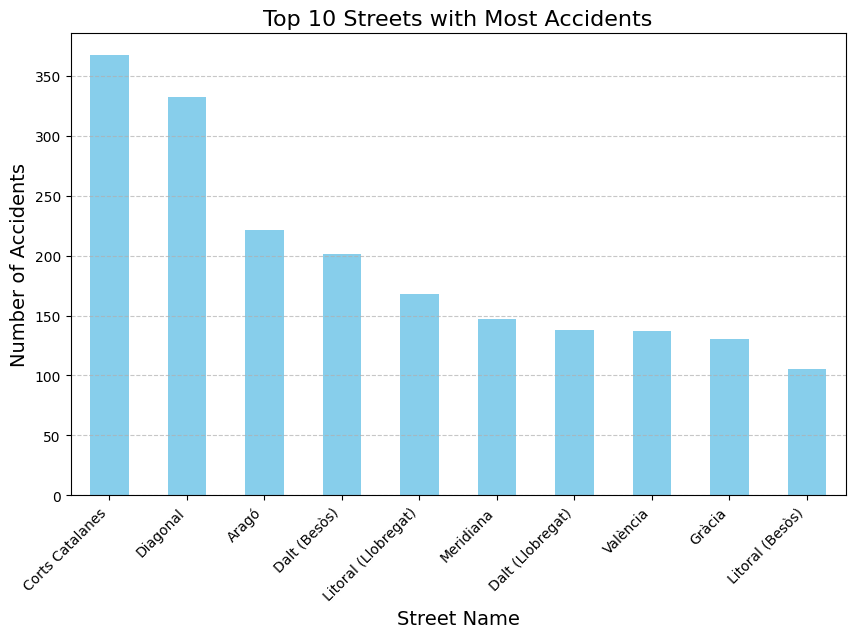

In [22]:
streets_accidents = accidents_causa['Street_Name'].value_counts().head(10)


plt.figure(figsize=(10, 6))
streets_accidents.plot(kind='bar', color='skyblue')
plt.title('Top 10 Streets with Most Accidents', fontsize=16)
plt.xlabel('Street Name', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Create a chart to show the dayframe of the accidents 

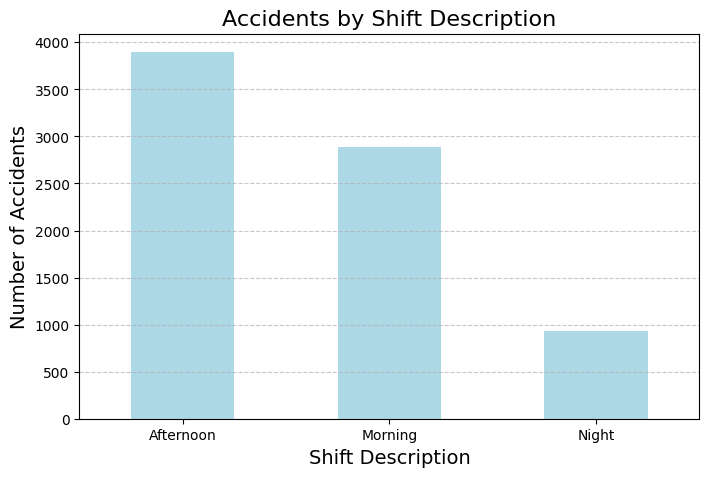

In [23]:
shift_counts = accidents_causa['Shift_Description'].value_counts()
plt.figure(figsize=(8, 5))
shift_counts.plot(kind='bar', color='lightblue')
plt.title('Accidents by Shift Description', fontsize=16)
plt.xlabel('Shift Description', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=0)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Map of accidents by location

In [24]:
accidents_map = folium.Map(location=[41.3851, 2.1734], zoom_start=12) 


for _, row in accidents_causa.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=3,
        color='red',
        fill=True,
        fill_opacity=0.6
    ).add_to(accidents_map)

accidents_map

# Heat map concentration of accidents by location

In [25]:
heat_data = accidents_causa[['Latitude', 'Longitude']].values.tolist()

heatmap_map = folium.Map(location=[41.3851, 2.1734], zoom_start=12)

HeatMap(heat_data, radius=10, blur=15, max_zoom=1).add_to(heatmap_map)

heatmap_map

# Top driver causes of accidents

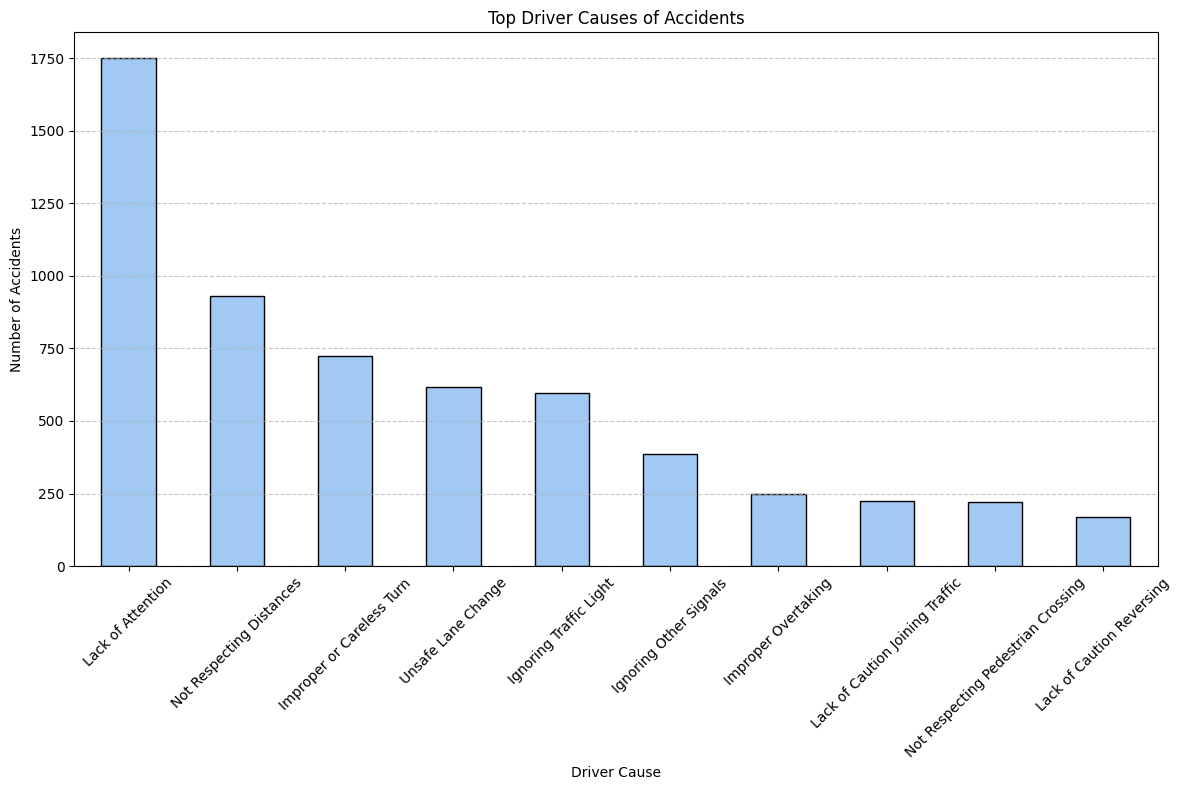

In [39]:
top_driver_causes = accidents_causa['Immediate_Cause_Description'].value_counts().head(10)
filtered_data = accidents_causa[~accidents_causa['Immediate_Cause_Description'].isin(['Unknown', 'Others', 'Not determined', 'Altres', 'No determinada'])]

top_driver_causes = filtered_data['Immediate_Cause_Description'].value_counts().head(10)

sns.set_palette("pastel")
plt.figure(figsize=(12, 8))
top_driver_causes.plot(kind='bar', edgecolor='black')
plt.title('Top Driver Causes of Accidents')
plt.xlabel('Driver Cause')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Top driver causes of accidents by time

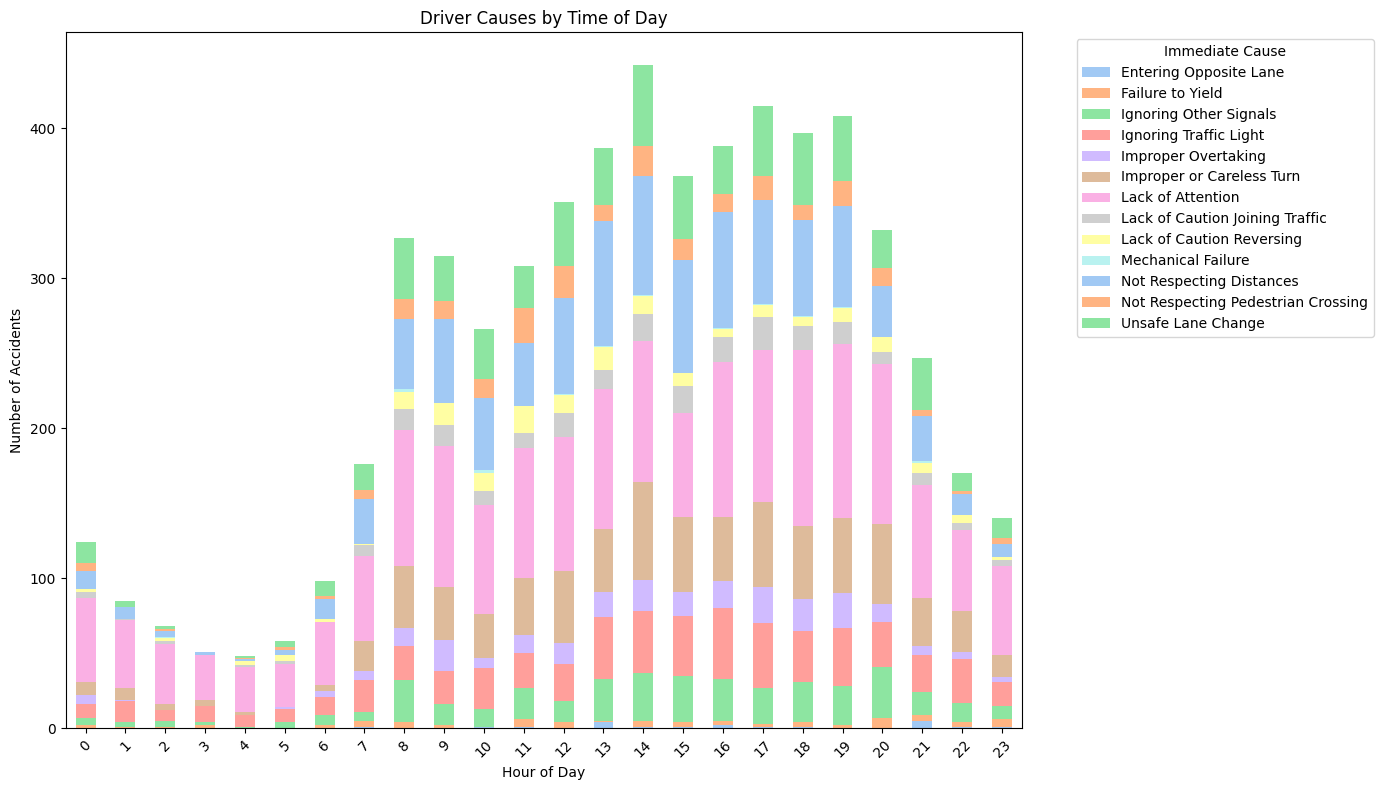

In [38]:
filtered_data = accidents_causa[~accidents_causa['Immediate_Cause_Description'].isin(['Unknown', 'Others', 'Not determined', 'Altres', 'No determinada'])]

cause_by_hour = filtered_data.groupby(['Hour_of_Day', 'Immediate_Cause_Description']).size().unstack(fill_value=0)
sns.set_palette("pastel")
cause_by_hour.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Driver Causes by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Immediate Cause', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Peak Hours for Accidents

### Scatter plot

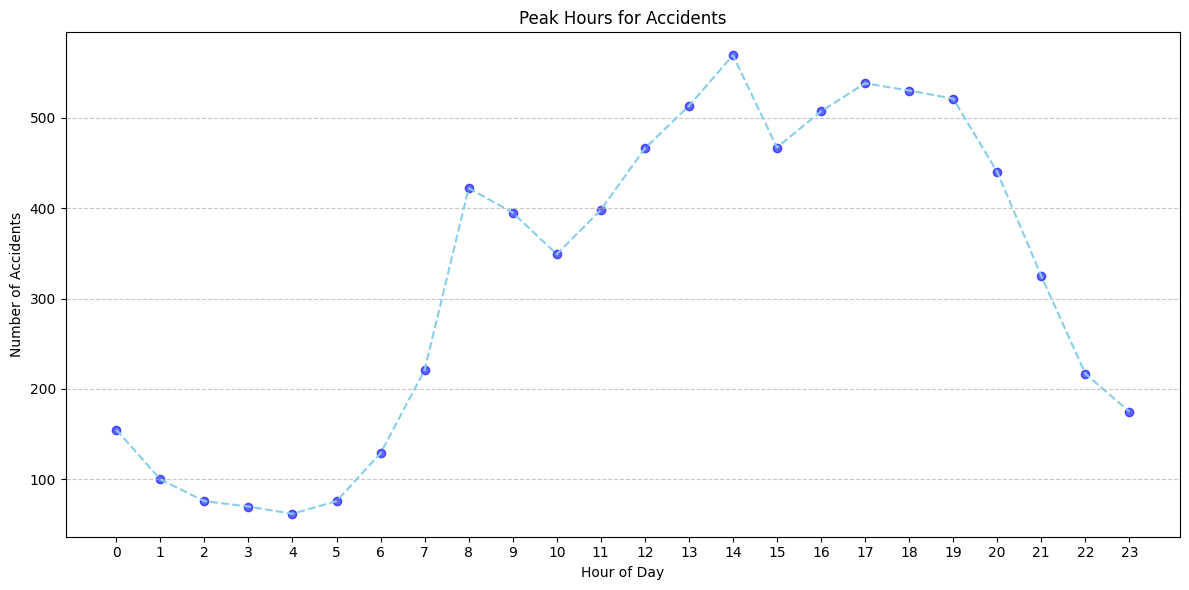

In [37]:
accidents_by_hour = accidents_causa.groupby('Hour_of_Day').size().reset_index(name='Count')


plt.figure(figsize=(12, 6))
plt.scatter(accidents_by_hour['Hour_of_Day'], accidents_by_hour['Count'], color='blue', alpha=0.6)
plt.plot(accidents_by_hour['Hour_of_Day'], accidents_by_hour['Count'], color='skyblue', linestyle='--')
plt.title('Peak Hours for Accidents')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Density plot

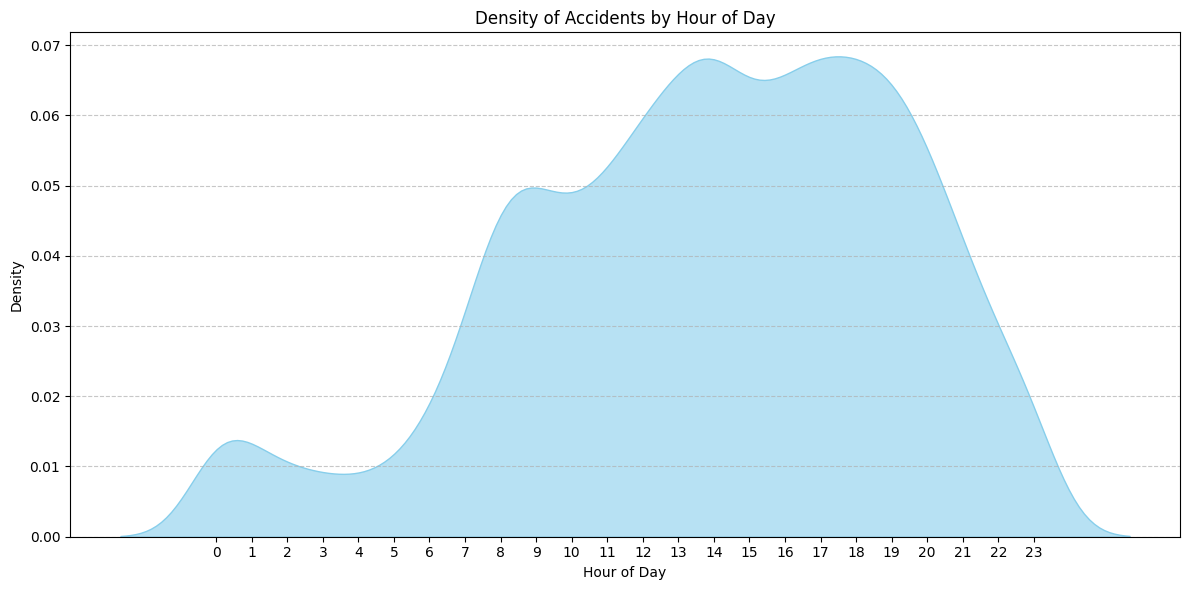

In [29]:
plt.figure(figsize=(12, 6))
sns.kdeplot(accidents_causa['Hour_of_Day'], fill=True, color='skyblue', alpha=0.6)
plt.title('Density of Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Density')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()